In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Data preprocessing

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
data = pd.read_csv('data/tested.csv')
data = data.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'])
missing_columns = data.columns[data.isnull().any()]
imp = SimpleImputer(strategy='mean')
data[missing_columns] = imp.fit_transform(data[missing_columns])
data = pd.get_dummies(data)
x = data.drop(columns=['Survived'])
y = data['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, shuffle=True)

Correlation between data

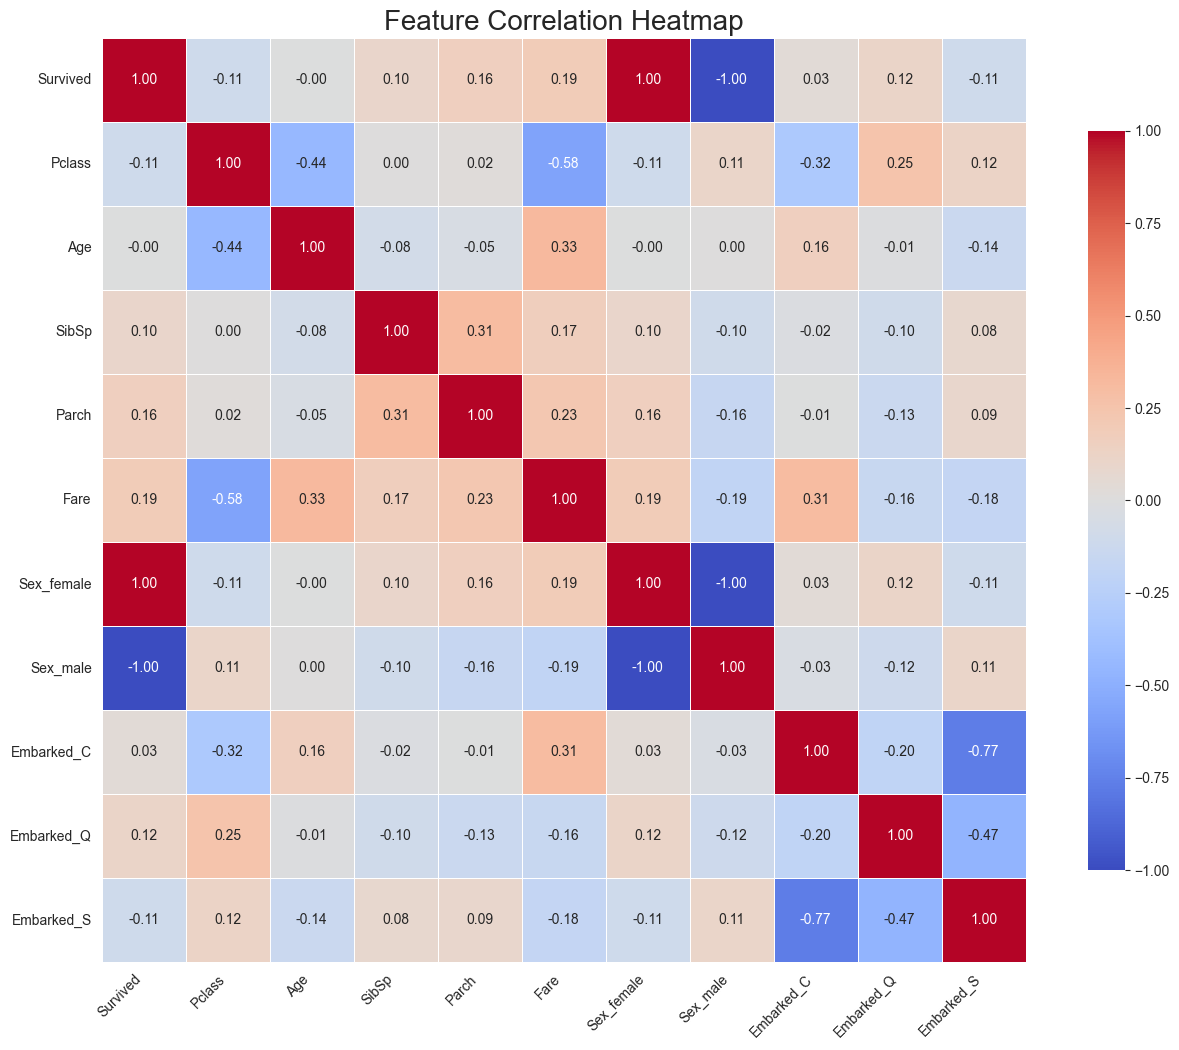

In [3]:
corr = data.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            square=True,
            linewidths=0.5,
            cbar_kws={'shrink': .8})
plt.title('Feature Correlation Heatmap', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

# Training models


In [4]:
model_scores = {}

## K-NN classifier
find the best 'k'

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

rng = range(1, 31)
cv_scores = []

for k in rng:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

best_k = rng[np.argmax(cv_scores)]
worst_k = rng[np.argmin(cv_scores)]
print(f'Best k:{best_k}')
print(f'Worst k:{worst_k}')

Best k:1
Worst k:27


### K-NN evaluation of model

In [6]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(f'-----Metrics for Best K: {best_k}-----')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'Confusion Matrix: {confusion_matrix(y_test, y_pred)}')

knn = KNeighborsClassifier(n_neighbors=worst_k)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(f'-----Metrics for Worst K: {worst_k}-----')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'Confusion Matrix: {confusion_matrix(y_test, y_pred)}')
model_scores['KNN'] = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),
                       recall_score(y_test, y_pred), f1_score(y_test, y_pred)]

-----Metrics for Best K: 1-----
Accuracy: 0.7380952380952381
Precision: 0.65625
Recall: 0.65625
F1 Score: 0.65625
Confusion Matrix: [[41 11]
 [11 21]]
-----Metrics for Worst K: 27-----
Accuracy: 0.6666666666666666
Precision: 0.7
Recall: 0.21875
F1 Score: 0.3333333333333333
Confusion Matrix: [[49  3]
 [25  7]]


## SVM


In [7]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

svm = SVC(kernel='rbf')
svm.fit(x_train_scaled, y_train)

SVC()

In [8]:
y_pred = svm.predict(x_test_scaled)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'Confusion Matrix: {confusion_matrix(y_test, y_pred)}')
model_scores['SVM'] = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),
                       recall_score(y_test, y_pred), f1_score(y_test, y_pred)]

Accuracy: 0.9761904761904762
Precision: 1.0
Recall: 0.9375
F1 Score: 0.967741935483871
Confusion Matrix: [[52  0]
 [ 2 30]]


## Logistic Classification

In [9]:
from sklearn.linear_model import LogisticRegressionCV

log = LogisticRegressionCV(cv=5, max_iter=1000)
log.fit(x_train, y_train)

LogisticRegressionCV(cv=5, max_iter=1000)

In [10]:
y_pred = log.predict(x_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'Confusion Matrix: {confusion_matrix(y_test, y_pred)}')
model_scores['Logistic'] = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),
                       recall_score(y_test, y_pred), f1_score(y_test, y_pred)]

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix: [[52  0]
 [ 0 32]]


## Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', random_state=0)
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [12]:
y_pred = tree.predict(x_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'Confusion Matrix: {confusion_matrix(y_test, y_pred)}')
model_scores['Decision Tree'] = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),
                       recall_score(y_test, y_pred), f1_score(y_test, y_pred)]

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix: [[52  0]
 [ 0 32]]


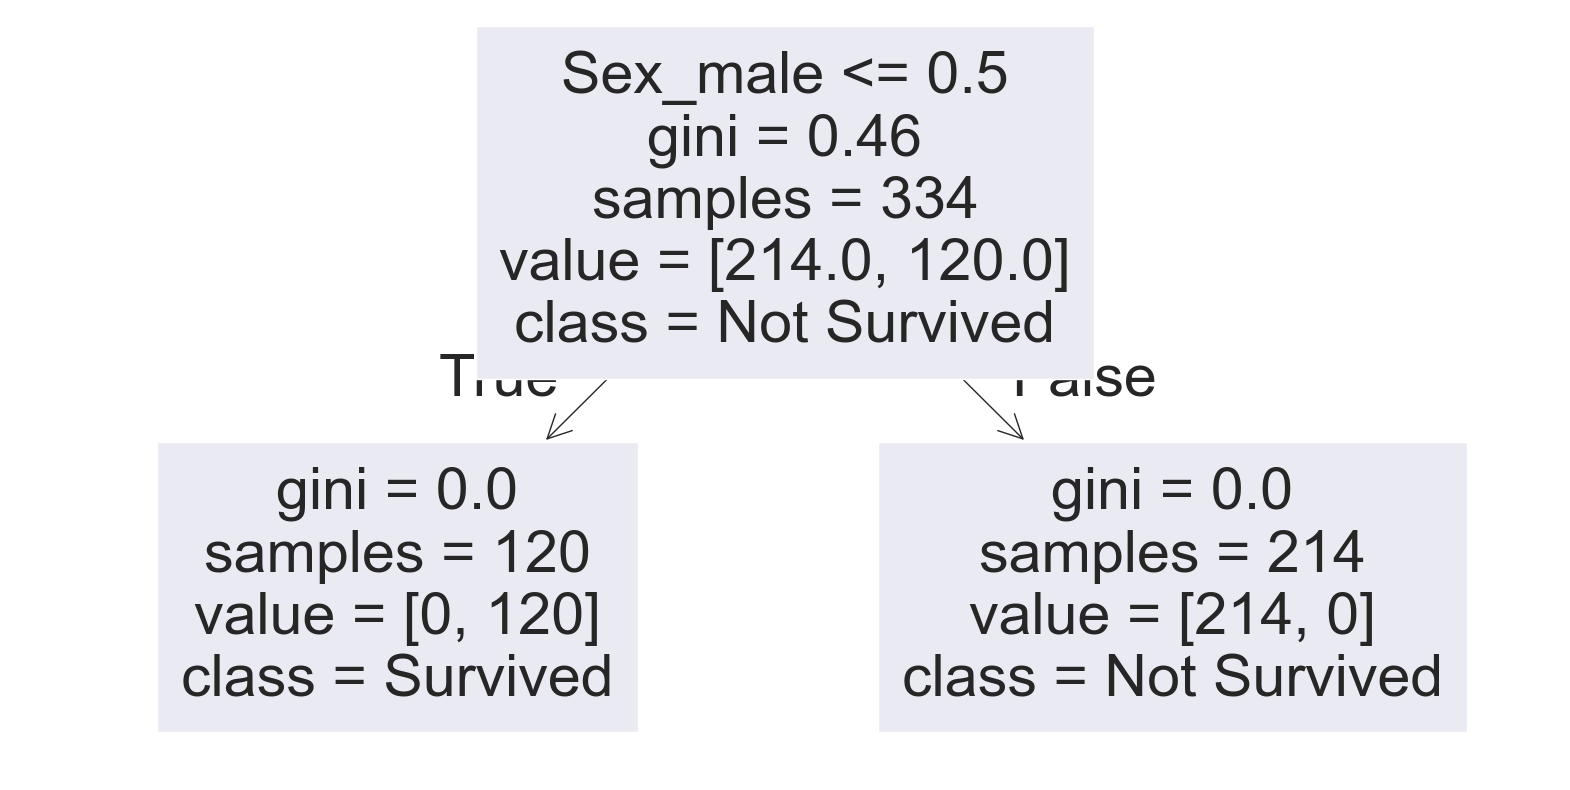

In [13]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=x_train.columns, class_names=['Not Survived', 'Survived'])
plt.show()

## Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB

naive = GaussianNB()
naive.fit(x_train, y_train)

GaussianNB()

In [15]:
y_pred = naive.predict(x_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'Confusion Matrix: {confusion_matrix(y_test, y_pred)}')
model_scores['Naive Bayes'] = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),
                       recall_score(y_test, y_pred), f1_score(y_test, y_pred)]

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix: [[52  0]
 [ 0 32]]


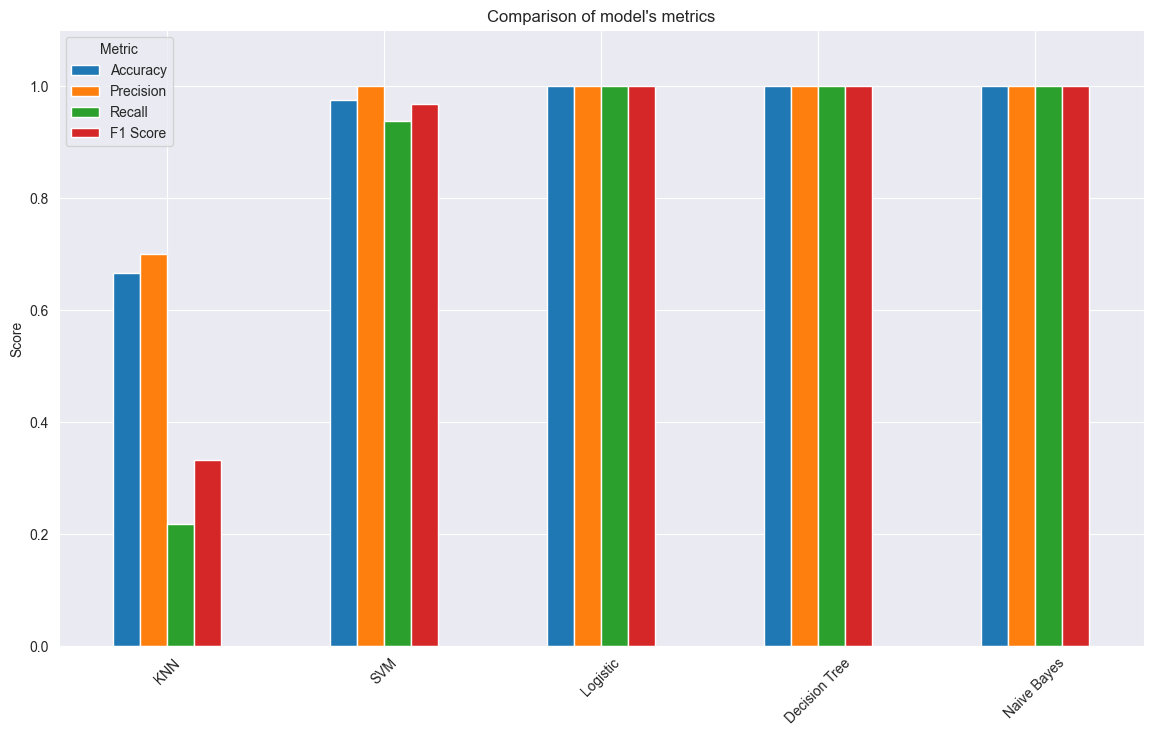

,Accuracy,Precision,Recall,F1 Score
KNN,0.666667,0.7,0.21875,0.333333
SVM,0.976190,1.0,0.93750,0.967742
Logistic,1.000000,1.0,1.00000,1.000000
Decision Tree,1.000000,1.0,1.00000,1.000000
Naive Bayes,1.000000,1.0,1.00000,1.000000


In [16]:
res = pd.DataFrame(model_scores, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
res = res.T

res.plot(kind='bar', figsize=(14,8))
plt.title('Comparison of model\'s metrics')
plt.ylabel('Score')
plt.ylim(0, 1.1)  # Scores go from 0 to 1
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.grid(True)
plt.show()
res